# **Stable Diffusion diversity evaluation**  


## Load packages.

In [215]:
#!pip install tensorflow==1.15.0 
#!pip install keras==2.1.6

#!pip install h5py==2.7.0 Keras==2.0.8 keras_vggface==0.3 numpy==1.13.1 imutils==0.4.3 matplotlib==2.0.2 scipy==0.19.0 Pillow==4.2.1 dlib==19.6.0 scikit_learn==0.19.0
!pip install --force cv2
import keras
from deepface import DeepFace


from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from multiprocessing.pool import ThreadPool as Pool

%cd Face-expression-and-ethnic-recognition
#from face_network import create_face_network
import cv2
import argparse
import numpy as np
import pandas
from keras.optimizers import Adam, SGD

#model = create_face_network(nb_class=4, hidden_dim=512, shape=(224, 224, 3))   

#means = np.load('myfolder/FACE/stable-diffusion/Face-expression-and-ethnic-recognition/means_ethnic.npy')
#model.load_weights('myfolder/FACE/stable-diffusion/Face-expression-and-ethnic-recognition/weights_ethnic.hdf5')


In [84]:
prompt_asian_dic = {}
prompt_asian_dic_ = {}
lf = {}
prompt_asian_dic_asian_num = {}
modes = set()
experiments = set()
 
with open('myfolder/int----asian_Woman.txt', 'r') as f:
    lines = []
    for line in f:
        lines.append(line.strip())
    for i in range(len(lines)):
     try:
      line = lines[i]
      if i + 1 < len(lines) and lines[i + 1].find(':') == -1:
            line += ' ' + lines[i+1]
      parts = line.split(':')
      if len(parts) > 2:
        parts = [parts[0], parts[1].split('/')[0]]

      #if len(parts) != 2:
        #print(line)
      if len(parts) == 2 and line.find('batch_50') != -1:
       value = float(parts[1].split(' ')[1])
       path = parts[0]
       parts = path.split('/')
       if len(parts) >= 3:
        batch = parts[-1]
        mode = parts[-2]
        
        if os.path.exists(path) and batch not in experiments:
         if len(os.listdir(path)) > 20:
            prompt = parts[-3].split('mindis')[0]
            modes.add(mode)
            experiments.add(batch)
            if path.find('([3.2000])') != -1:
                prompt = prompt + '_longexp'
            elif path.find('_0_') != -1:
                prompt = prompt + '_longexp_2'
            elif path.find('([3.1000])') != -1:
                prompt = prompt + '_standardexp'
        
            if prompt not in prompt_asian_dic:
                prompt_asian_dic[prompt] = {}
                prompt_asian_dic_[prompt] = {}
                lf[prompt] = {}
                prompt_asian_dic_asian_num[prompt] = {}
            
            if mode not in prompt_asian_dic_asian_num[prompt].keys():
                prompt_asian_dic_asian_num[prompt][mode] = 0
                prompt_asian_dic[prompt][mode] = 0
                prompt_asian_dic_[prompt][mode] = {}
                
            if batch not in prompt_asian_dic_[prompt][mode].keys():
                prompt_asian_dic_[prompt][mode][batch] = 0
                
                
            prompt_asian_dic[prompt][mode] += min(value, 1) * 100#value
            prompt_asian_dic_[prompt][mode][batch] = min(value, 1)
            lf[prompt][mode] = path[:path.find(path.split('/')[-1])]

             
            prompt_asian_dic_asian_num[prompt][mode] += 1
     except: 
      print('Err')
            
for k in prompt_asian_dic.keys():
    for m in prompt_asian_dic[k].keys():
        if prompt_asian_dic[k][m] != 0:
            prompt_asian_dic[k][m] = prompt_asian_dic[k][m]/prompt_asian_dic_asian_num[k][m]
        

Err


In [85]:
prompt_asian_Man_dic = {}
prompt_asian_Man_dic_ = {}
lf = {}
prompt_asian_Man_dic_asian_Man_num = {}
modes = set()
experiments = set()
 
with open('myfolder/int----asian_Man.txt', 'r') as f:
    lines = []
    for line in f:
        lines.append(line.strip())
    for i in range(len(lines)):
     try:
      line = lines[i]
      if i + 1 < len(lines) and lines[i + 1].find(':') == -1:
            line += ' ' + lines[i+1]
      parts = line.split(':')
      if len(parts) > 2:
        parts = [parts[0], parts[1].split('/')[0]]

      #if len(parts) != 2:
        #print(line)
      if len(parts) == 2 and line.find('batch_50') != -1:
       value = float(parts[1].split(' ')[1])
       path = parts[0]
       parts = path.split('/')
       if len(parts) >= 3:
        batch = parts[-1]
        mode = parts[-2]
        
        if os.path.exists(path) and batch not in experiments:
         if len(os.listdir(path)) > 20:
            prompt = parts[-3].split('mindis')[0]
            modes.add(mode)
            experiments.add(batch)
            if path.find('([3.2000])') != -1:
                prompt = prompt + '_longexp'
            elif path.find('_0_') != -1:
                prompt = prompt + '_longexp_2'
            elif path.find('([3.1000])') != -1:
                prompt = prompt + '_standardexp'
        
            if prompt not in prompt_asian_Man_dic:
                prompt_asian_Man_dic[prompt] = {}
                prompt_asian_Man_dic_[prompt] = {}
                lf[prompt] = {}
                prompt_asian_Man_dic_asian_Man_num[prompt] = {}
            
            if mode not in prompt_asian_Man_dic_asian_Man_num[prompt].keys():
                prompt_asian_Man_dic_asian_Man_num[prompt][mode] = 0
                prompt_asian_Man_dic[prompt][mode] = 0
                prompt_asian_Man_dic_[prompt][mode] = {}
                
            if batch not in prompt_asian_Man_dic_[prompt][mode].keys():
                prompt_asian_Man_dic_[prompt][mode][batch] = 0
                
                
            prompt_asian_Man_dic[prompt][mode] += min(value, 1) * 100#value
            prompt_asian_Man_dic_[prompt][mode][batch] = min(value, 1)
            lf[prompt][mode] = path[:path.find(path.split('/')[-1])]

             
            prompt_asian_Man_dic_asian_Man_num[prompt][mode] += 1
     except: 
      print('Err')
            
for k in prompt_asian_Man_dic.keys():
    for m in prompt_asian_Man_dic[k].keys():
        if prompt_asian_Man_dic[k][m] != 0:
            prompt_asian_Man_dic[k][m] = prompt_asian_Man_dic[k][m]/prompt_asian_Man_dic_asian_Man_num[k][m]
        

Err


In [86]:
prompt_white_dic = {}
prompt_white_dic_ = {}
lf = {}
prompt_white_dic_white_num = {}
modes = set()
experiments = set()
 
with open('myfolder/int----white_Woman.txt', 'r') as f:
    lines = []
    for line in f:
        lines.append(line.strip())
    for i in range(len(lines)):
     try:
      line = lines[i]
      if i + 1 < len(lines) and lines[i + 1].find(':') == -1:
            line += ' ' + lines[i+1]
      parts = line.split(':')
      if len(parts) > 2:
        parts = [parts[0], parts[1].split('/')[0]]

      #if len(parts) != 2:
        #print(line)
      if len(parts) == 2 and line.find('batch_50') != -1:
       value = float(parts[1].split(' ')[1])
       path = parts[0]
       parts = path.split('/')
       if len(parts) >= 3:
        batch = parts[-1]
        mode = parts[-2]
        
        if os.path.exists(path) and batch not in experiments:
         if len(os.listdir(path)) > 20:
            prompt = parts[-3].split('mindis')[0]
            modes.add(mode)
            experiments.add(batch)
            if path.find('([3.2000])') != -1:
                prompt = prompt + '_longexp'
            elif path.find('_0_') != -1:
                prompt = prompt + '_longexp_2'
            elif path.find('([3.1000])') != -1:
                prompt = prompt + '_standardexp'
        
            if prompt not in prompt_white_dic:
                prompt_white_dic[prompt] = {}
                prompt_white_dic_[prompt] = {}
                lf[prompt] = {}
                prompt_white_dic_white_num[prompt] = {}
            
            if mode not in prompt_white_dic_white_num[prompt].keys():
                prompt_white_dic_white_num[prompt][mode] = 0
                prompt_white_dic[prompt][mode] = 0
                prompt_white_dic_[prompt][mode] = {}
                
            if batch not in prompt_white_dic_[prompt][mode].keys():
                prompt_white_dic_[prompt][mode][batch] = 0
                
                
            prompt_white_dic[prompt][mode] += min(value, 1) * 100#value
            prompt_white_dic_[prompt][mode][batch] = min(value, 1)
            lf[prompt][mode] = path[:path.find(path.split('/')[-1])]

             
            prompt_white_dic_white_num[prompt][mode] += 1
     except: 
      print('Err')
            
for k in prompt_white_dic.keys():
    for m in prompt_white_dic[k].keys():
        if prompt_white_dic[k][m] != 0:
            prompt_white_dic[k][m] = prompt_white_dic[k][m]/prompt_white_dic_white_num[k][m]
        

Err


In [87]:
prompt_white_Man_dic = {}
prompt_white_Man_dic_ = {}
lf = {}
prompt_white_Man_dic_white_Man_num = {}
modes = set()
experiments = set()
 
with open('myfolder/int----white_Man.txt', 'r') as f:
    lines = []
    for line in f:
        lines.append(line.strip())
    for i in range(len(lines)):
     try:
      line = lines[i]
      if i + 1 < len(lines) and lines[i + 1].find(':') == -1:
            line += ' ' + lines[i+1]
      parts = line.split(':')
      if len(parts) > 2:
        parts = [parts[0], parts[1].split('/')[0]]

      #if len(parts) != 2:
        #print(line)
      if len(parts) == 2 and line.find('batch_50') != -1:
       value = float(parts[1].split(' ')[1])
       path = parts[0]
       parts = path.split('/')
       if len(parts) >= 3:
        batch = parts[-1]
        mode = parts[-2]
        
        if os.path.exists(path) and batch not in experiments:
         if len(os.listdir(path)) > 20:
            prompt = parts[-3].split('mindis')[0]
            modes.add(mode)
            experiments.add(batch)
            if path.find('([3.2000])') != -1:
                prompt = prompt + '_longexp'
            elif path.find('_0_') != -1:
                prompt = prompt + '_longexp_2'
            elif path.find('([3.1000])') != -1:
                prompt = prompt + '_standardexp'
        
            if prompt not in prompt_white_Man_dic:
                prompt_white_Man_dic[prompt] = {}
                prompt_white_Man_dic_[prompt] = {}
                lf[prompt] = {}
                prompt_white_Man_dic_white_Man_num[prompt] = {}
            
            if mode not in prompt_white_Man_dic_white_Man_num[prompt].keys():
                prompt_white_Man_dic_white_Man_num[prompt][mode] = 0
                prompt_white_Man_dic[prompt][mode] = 0
                prompt_white_Man_dic_[prompt][mode] = {}
                
            if batch not in prompt_white_Man_dic_[prompt][mode].keys():
                prompt_white_Man_dic_[prompt][mode][batch] = 0
                
                
            prompt_white_Man_dic[prompt][mode] += min(value, 1) * 100#value
            prompt_white_Man_dic_[prompt][mode][batch] = min(value, 1)
            lf[prompt][mode] = path[:path.find(path.split('/')[-1])]

             
            prompt_white_Man_dic_white_Man_num[prompt][mode] += 1
     except: 
      print('Err')
            
for k in prompt_white_Man_dic.keys():
    for m in prompt_white_Man_dic[k].keys():
        if prompt_white_Man_dic[k][m] != 0:
            prompt_white_Man_dic[k][m] = prompt_white_Man_dic[k][m]/prompt_white_Man_dic_white_Man_num[k][m]
        

Err


In [88]:
prompt_black_dic = {}
prompt_black_dic_ = {}
lf = {}
prompt_black_dic_black_num = {}
modes = set()
experiments = set()
 
with open('myfolder/int----black_Woman.txt', 'r') as f:
    lines = []
    for line in f:
        lines.append(line.strip())
    for i in range(len(lines)):
     try:
      line = lines[i]
      if i + 1 < len(lines) and lines[i + 1].find(':') == -1:
            line += ' ' + lines[i+1]
      parts = line.split(':')
      if len(parts) > 2:
        parts = [parts[0], parts[1].split('/')[0]]

      #if len(parts) != 2:
        #print(line)
      if len(parts) == 2 and line.find('batch_50') != -1:
       value = float(parts[1].split(' ')[1])
       path = parts[0]
       parts = path.split('/')
       if len(parts) >= 3:
        batch = parts[-1]
        mode = parts[-2]
        
        if os.path.exists(path) and batch not in experiments:
         if len(os.listdir(path)) > 20:
            prompt = parts[-3].split('mindis')[0]
            modes.add(mode)
            experiments.add(batch)
            if path.find('([3.2000])') != -1:
                prompt = prompt + '_longexp'
            elif path.find('_0_') != -1:
                prompt = prompt + '_longexp_2'
            elif path.find('([3.1000])') != -1:
                prompt = prompt + '_standardexp'
        
            if prompt not in prompt_black_dic:
                prompt_black_dic[prompt] = {}
                prompt_black_dic_[prompt] = {}
                lf[prompt] = {}
                prompt_black_dic_black_num[prompt] = {}
            
            if mode not in prompt_black_dic_black_num[prompt].keys():
                prompt_black_dic_black_num[prompt][mode] = 0
                prompt_black_dic[prompt][mode] = 0
                prompt_black_dic_[prompt][mode] = {}
                
            if batch not in prompt_black_dic_[prompt][mode].keys():
                prompt_black_dic_[prompt][mode][batch] = 0
                
                
            prompt_black_dic[prompt][mode] += min(value, 1) * 100#value
            prompt_black_dic_[prompt][mode][batch] = min(value, 1)
            lf[prompt][mode] = path[:path.find(path.split('/')[-1])]

             
            prompt_black_dic_black_num[prompt][mode] += 1
     except: 
      print('Err')
            
for k in prompt_black_dic.keys():
    for m in prompt_black_dic[k].keys():
        if prompt_black_dic[k][m] != 0:
            prompt_black_dic[k][m] = prompt_black_dic[k][m]/prompt_black_dic_black_num[k][m]
        

Err


In [89]:
prompt_black_Man_dic = {}
prompt_black_Man_dic_ = {}
lf = {}
prompt_black_Man_dic_black_Man_num = {}
modes = set()
experiments = set()
 
with open('myfolder/int----black_Man.txt', 'r') as f:
    lines = []
    for line in f:
        lines.append(line.strip())
    for i in range(len(lines)):
     try:
      line = lines[i]
      if i + 1 < len(lines) and lines[i + 1].find(':') == -1:
            line += ' ' + lines[i+1]
      parts = line.split(':')
      if len(parts) > 2:
        parts = [parts[0], parts[1].split('/')[0]]

      #if len(parts) != 2:
        #print(line)
      if len(parts) == 2 and line.find('batch_50') != -1:
       value = float(parts[1].split(' ')[1])
       path = parts[0]
       parts = path.split('/')
       if len(parts) >= 3:
        batch = parts[-1]
        mode = parts[-2]
        
        if os.path.exists(path) and batch not in experiments:
         if len(os.listdir(path)) > 20:
            prompt = parts[-3].split('mindis')[0]
            modes.add(mode)
            experiments.add(batch)
            if path.find('([3.2000])') != -1:
                prompt = prompt + '_longexp'
            elif path.find('_0_') != -1:
                prompt = prompt + '_longexp_2'
            elif path.find('([3.1000])') != -1:
                prompt = prompt + '_standardexp'
        
            if prompt not in prompt_black_Man_dic:
                prompt_black_Man_dic[prompt] = {}
                prompt_black_Man_dic_[prompt] = {}
                lf[prompt] = {}
                prompt_black_Man_dic_black_Man_num[prompt] = {}
            
            if mode not in prompt_black_Man_dic_black_Man_num[prompt].keys():
                prompt_black_Man_dic_black_Man_num[prompt][mode] = 0
                prompt_black_Man_dic[prompt][mode] = 0
                prompt_black_Man_dic_[prompt][mode] = {}
                
            if batch not in prompt_black_Man_dic_[prompt][mode].keys():
                prompt_black_Man_dic_[prompt][mode][batch] = 0
                
                
            prompt_black_Man_dic[prompt][mode] += min(value, 1) * 100#value
            prompt_black_Man_dic_[prompt][mode][batch] = min(value, 1)
            lf[prompt][mode] = path[:path.find(path.split('/')[-1])]

             
            prompt_black_Man_dic_black_Man_num[prompt][mode] += 1
     except: 
      print('Err')
            
for k in prompt_black_Man_dic.keys():
    for m in prompt_black_Man_dic[k].keys():
        if prompt_black_Man_dic[k][m] != 0:
            prompt_black_Man_dic[k][m] = prompt_black_Man_dic[k][m]/prompt_black_Man_dic_black_Man_num[k][m]
        

Err


In [108]:
prompt_hispanic_dic = {}
prompt_hispanic_dic_ = {}
lf = {}
prompt_hispanic_dic_hispanic_num = {}
modes = set()
experiments = set()
 
with open('myfolder/int----hispanic_Woman.txt', 'r') as f:
    lines = []
    for line in f:
        lines.append(line.strip())
    for i in range(len(lines)):
     try:
      line = lines[i]
      if i + 1 < len(lines) and lines[i + 1].find(':') == -1:
            line += ' ' + lines[i+1]
      parts = line.split(':')
      if len(parts) > 2:
        parts = [parts[0], parts[1].split('/')[0]]

      #if len(parts) != 2:
        #print(line)
      if len(parts) == 2 and line.find('batch_50') != -1:
       value = float(parts[1].split(' ')[1])
       path = parts[0]
       parts = path.split('/')
       if len(parts) >= 3:
        batch = parts[-1]
        mode = parts[-2]
        
        if os.path.exists(path) and batch not in experiments:
         if len(os.listdir(path)) > 20:
            prompt = parts[-3].split('mindis')[0]
            modes.add(mode)
            experiments.add(batch)
            if path.find('([3.2000])') != -1:
                prompt = prompt + '_longexp'
            elif path.find('_0_') != -1:
                prompt = prompt + '_longexp_2'
            elif path.find('([3.1000])') != -1:
                prompt = prompt + '_standardexp'
        
            if prompt not in prompt_hispanic_dic:
                prompt_hispanic_dic[prompt] = {}
                prompt_hispanic_dic_[prompt] = {}
                lf[prompt] = {}
                prompt_hispanic_dic_hispanic_num[prompt] = {}
            
            if mode not in prompt_hispanic_dic_hispanic_num[prompt].keys():
                prompt_hispanic_dic_hispanic_num[prompt][mode] = 0
                prompt_hispanic_dic[prompt][mode] = 0
                prompt_hispanic_dic_[prompt][mode] = {}
                
            if batch not in prompt_hispanic_dic_[prompt][mode].keys():
                prompt_hispanic_dic_[prompt][mode][batch] = 0
                
                
            prompt_hispanic_dic[prompt][mode] += min(value, 1) * 100#value
            prompt_hispanic_dic_[prompt][mode][batch] = min(value, 1)
            lf[prompt][mode] = path[:path.find(path.split('/')[-1])]

             
            prompt_hispanic_dic_hispanic_num[prompt][mode] += 1
     except: 
      print('Err')
            
for k in prompt_hispanic_dic.keys():
    for m in prompt_hispanic_dic[k].keys():
        if prompt_hispanic_dic[k][m] != 0:
            prompt_hispanic_dic[k][m] = prompt_hispanic_dic[k][m]/prompt_hispanic_dic_hispanic_num[k][m]
        

In [109]:
prompt_hispanic_Man_dic = {}
prompt_hispanic_Man_dic_ = {}
lf = {}
prompt_hispanic_Man_dic_hispanic_Man_num = {}
modes = set()
experiments = set()
 
with open('myfolder/int----hispanic_Man.txt', 'r') as f:
    lines = []
    for line in f:
        lines.append(line.strip())
    for i in range(len(lines)):
     try:
      line = lines[i]
      if i + 1 < len(lines) and lines[i + 1].find(':') == -1:
            line += ' ' + lines[i+1]
      parts = line.split(':')
      if len(parts) > 2:
        parts = [parts[0], parts[1].split('/')[0]]

      #if len(parts) != 2:
        #print(line)
      if len(parts) == 2 and line.find('batch_50') != -1:
       value = float(parts[1].split(' ')[1])
       path = parts[0]
       parts = path.split('/')
       if len(parts) >= 3:
        batch = parts[-1]
        mode = parts[-2]
        
        if os.path.exists(path) and batch not in experiments:
         if len(os.listdir(path)) > 20:
            prompt = parts[-3].split('mindis')[0]
            modes.add(mode)
            experiments.add(batch)
            if path.find('([3.2000])') != -1:
                prompt = prompt + '_longexp'
            elif path.find('_0_') != -1:
                prompt = prompt + '_longexp_2'
            elif path.find('([3.1000])') != -1:
                prompt = prompt + '_standardexp'
        
            if prompt not in prompt_hispanic_Man_dic:
                prompt_hispanic_Man_dic[prompt] = {}
                prompt_hispanic_Man_dic_[prompt] = {}
                lf[prompt] = {}
                prompt_hispanic_Man_dic_hispanic_Man_num[prompt] = {}
            
            if mode not in prompt_hispanic_Man_dic_hispanic_Man_num[prompt].keys():
                prompt_hispanic_Man_dic_hispanic_Man_num[prompt][mode] = 0
                prompt_hispanic_Man_dic[prompt][mode] = 0
                prompt_hispanic_Man_dic_[prompt][mode] = {}
                
            if batch not in prompt_hispanic_Man_dic_[prompt][mode].keys():
                prompt_hispanic_Man_dic_[prompt][mode][batch] = 0
                
                
            prompt_hispanic_Man_dic[prompt][mode] += min(value, 1) * 100#value
            prompt_hispanic_Man_dic_[prompt][mode][batch] = min(value, 1)
            lf[prompt][mode] = path[:path.find(path.split('/')[-1])]

             
            prompt_hispanic_Man_dic_hispanic_Man_num[prompt][mode] += 1
     except: 
      print('Err')
            
for k in prompt_hispanic_Man_dic.keys():
    for m in prompt_hispanic_Man_dic[k].keys():
        if prompt_hispanic_Man_dic[k][m] != 0:
            prompt_hispanic_Man_dic[k][m] = prompt_hispanic_Man_dic[k][m]/prompt_hispanic_Man_dic_hispanic_Man_num[k][m]
        

Err


In [111]:
def compute_error(cum_prob, num_images, t=1.71):
        cff = 1
        if cum_prob > 1:
            cff = 100
        cum_prob /= cff
        if num_images > 0:
            s_d = math.sqrt(cum_prob * (1 - cum_prob) / (num_images))
        
            l =  2 * cum_prob * t * s_d
            u =  2 * (1-cum_prob) * t * s_d

            return l * cff , u * cff
        else:
            return 0, 0
    

import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_graph(prompt_dic, prompt_dic_num, lf_dic, num_modes, modes, sd=None, title='Percentages obtained in different modes', updated_experiment=True):
    if updated_experiment == True:
        title += ', long experiment'
    else:
        title += ', standard experiment'
    pr = []
    ks = []
    ms = sorted(list(modes))

    num_prompts = 0
    for k in sorted(list(prompt_dic.keys())):
        for m in ms:
         if m not in prompt_dic[k].keys():
            prompt_dic[k][m] = 0
         if (k.find('_longexp') != -1 and updated_experiment == True) or updated_experiment == None:
            ks.append(k)
            num_prompts += 1

         if (k.find('_standardexp') != -1 and updated_experiment == False) or updated_experiment == None:
            ks.append(k)
            num_prompts += 1

    p = []

    for k in ks:
        if k == 'a professional photograph of an adult person face_longexp':
            p.append('photo_longexp')
        elif k == 'a professional photograph of an adult person face_standardexp':
            p.append('photo_standardexp')
        elif k == "photo of an animal in the grass_longexp":
            p.append("animal_longexp")
        elif k == "photo of an animal in the grass_standardexp":
            p.append("animal_standardexp")
        elif k == "octane, hyperrealistic, backlit_longexp":
            p.append("octane_longexp")
        elif k == "octane, hyperrealistic, backlit_standardexp":
            p.append("octane_standardexp")
        else:
            p.append(k)

    if updated_experiment == True:
        for i in range(len(p)):
            pr.append(p[i].split('_longexp')[0])
    if updated_experiment == False:
        for i in range(len(p)):
            pr.append(p[i].split('_standardexp')[0])

    w = 0.5
    first_tick = int(math.ceil((num_modes * w / 2)))
    gap = num_modes * w + 1
    x = np.array([first_tick + i * gap for i in range(num_prompts)])

    # Use a distinct seaborn color palette for each mode
    colors = sns.color_palette('ocean', 100+1)[1:]
    for i in range(len(ms)):
        if ms[i] == 'f_mod':
            colors[i] = (0,0,0)
        if ms[i] == 'f_mod_cap_pooling':
            colors[i] = (1,0,0)

    fig, ax = plt.subplots(1, 1, figsize=(14, 10))
    ax.yaxis.grid(False)

    b = []

    for i in range(len(ms)):
        for k in ks:
            if ms[i] not in prompt_dic[k].keys():
                prompt_dic[k][ms[i]] = -1
            if ms[i] not in lf_dic[k]:
                lf_dic[k][ms[i]] = -1
        b.append(ax.barh(x - (i - num_modes / 2 + 0.5) * w,
                        [prompt_dic[k][ms[i]] for k in ks],
                        height=w,
                        color=colors[i],
                        align='center',
                        edgecolor='black',
                        linewidth=1.0,
                        alpha=0.5))

    modes_list = []

    for m in ms:
        if m == 'f_mod':
            modes_list.append('SD_baseline')
        elif m == 'f_mod_cap':
            modes_list.append('SD_cap')
        elif m == 'f_mod_max_pooling':
            modes_list.append('SD_pooling_max')
        elif m == 'f_mod_cap_pooling':
            modes_list.append('SD_pooling_cap')
        elif m == 'f_mod_max':
            modes_list.append('SD_min')
        elif m == 'f_mod_max_real':
            modes_list.append('SD_max')
        else:
            modes_list.append(m)

    ax.legend([b in b],
              modes_list,ncol=3,loc='best',framealpha=0.1)
    
    br = []
    x_new = []
    br_dic = {}

    for i in range(len(ms)):
        x_new += list(x - (i - num_modes / 2 + 0.5) * w)
        for k in ks:
            if ms[i] in prompt_dic[k].keys():
                br_el = prompt_dic[k][ms[i]]
                br.append(br_el)
                br_dic[len(br) - 1] = ms[i]
            else:
                br.append(-1)
                br_dic[0] = ms[i]
                prompt_dic[k][ms[i]] = 0

    error_l = [compute_error(br[0] / 100, prompt_dic_num[k][m])[0] * 100 for m in ms for k in ks]
    error_r = [compute_error(br[0] / 100, prompt_dic_num[k][m])[1] * 100 for m in ms for k in ks]

    if sd is not None:
        error_l = [sd[k][m] for m in ms for k in ks]
        error_r = [sd[k][m] for m in ms for k in ks]

    error = np.zeros((2, len(error_l)))

    for i in range(len(error_l)):
        error[0][i] = error_l[i]
        error[1][i] = error_r[i]

    # Draw line segments and dots for each mode
    for i, color in enumerate(colors):
        for j in range(len(ks)):
            x_val = x[j] - (i - num_modes / 2 + 0.5) * w
            y_val = br[j + len(ks) * i]
            error_left = error[0][j + len(ks) * i]
            error_right = error[1][j + len(ks) * i]

            # Draw the line segment
    ax.errorbar(br, x_new, xerr = error, fmt='none')
    ax.set_xlabel('Percentages')
    ax.set_ylabel('Modes')
    ax.set_title(title)
    ax.set_yticks(x)
    ax.set_yticklabels(pr)
    ax.legend([b_ for b_ in b], 
               modes_list, 
               ncol = 3, 
               loc = 'best', 
               framealpha = 0.1)

    ax.set_xlim(min(br)-max(error_l))
    plt.tight_layout()

    plt.savefig('graphs/' + title.replace('Percentage of image batches of', 'percent')
            .replace('that contain images with dominance of different colors (at least 2 from 3)', '2inRGB')
            .replace('contain images', '').replace(
    'Average number of dominant colors (among RGB) present in a batch', 'avg bs')
            .replace(' that contain at least one image with dominance of each color (Red, Green, Blue)', '1inRGB')
            .replace('with dominance of different colors ', '').replace(' ', '_').replace(',', '')
            .replace('.', '').replace('_,', '_').replace("_'", "_").replace('__', '_').replace('__', '_'))

    plt.show()


In [112]:
modes

{'f_mod',
 'f_mod_cap',
 'f_mod_cap_pooling',
 'f_mod_max_pooling',
 'f_mod_max_real'}

In [271]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_graph(prompt_dic, prompt_dic_num, lf_dic, num_modes, modes, sd=None, title='Percentages obtained in different modes', updated_experiment=True):
    if updated_experiment == True:
        title += ', long experiment'
    else:
        title += ', standard experiment'
    pr = []
    ks = []
    ms = sorted(list(modes))

    num_prompts = 0
    for k in sorted(list(prompt_dic.keys())):
        m_old = ms[0]
        for m in ms:
            m_old = m
            if m not in prompt_dic[k].keys():
                prompt_dic[k][m] = 0
        if (prompt_dic_num[k][m_old]) > 100:
         if (k.find('_longexp') != -1 and updated_experiment == True) or updated_experiment == None:
            ks.append(k)
            num_prompts += 1

         if (k.find('_standardexp') != -1 and updated_experiment == False) or updated_experiment == None:
            ks.append(k)
            num_prompts += 1

    p = []

    for k in ks:
        if k == 'a professional photograph of an adult person face_longexp':
            p.append('photo_longexp')
        elif k == 'a professional photograph of an adult person face_standardexp':
            p.append('photo_standardexp')
        elif k == "photo of an animal in the grass_longexp":
            p.append("animal_longexp")
        elif k == "photo of an animal in the grass_standardexp":
            p.append("animal_standardexp")
        elif k == "octane, hyperrealistic, backlit_longexp":
            p.append("octane_longexp")
        elif k == "octane, hyperrealistic, backlit_standardexp":
            p.append("octane_standardexp")
        else:
            p.append(k)

    if updated_experiment == True:
        for i in range(len(p)):
            pr.append(p[i].split('_longexp')[0])
    if updated_experiment == False:
        for i in range(len(p)):
            pr.append(p[i].split('_standardexp')[0])

    w = 0.5
    first_tick = int(math.ceil((num_modes * w / 2)))
    gap = num_modes * w + 1
    x = np.array([first_tick + i * gap for i in range(num_prompts)])

    # Use a distinct seaborn color palette for each mode
    colors = sns.color_palette('ocean', num_modes+1)[1:]
    for i in range(len(ms)):
        if ms[i] == 'f_mod':
            colors[i] = (0,0,0)
        if ms[i] == 'f_mod_cap_pooling':
            colors[i] = (1,0,0)

    fig, ax = plt.subplots(1, 1, figsize=(14, 10))
    ax.yaxis.grid(False)

    b = []

    for i in range(len(ms)):
        for k in ks:
            if ms[i] not in prompt_dic[k].keys():
                prompt_dic[k][ms[i]] = -1
            if ms[i] not in lf_dic[k]:
                lf_dic[k][ms[i]] = -1
        b.append(ax.barh(x - (i - num_modes / 2 + 0.5) * w,
                        [prompt_dic[k][ms[i]] for k in ks],
                        height=w,
                        color=colors[i],
                        align='center',
                        edgecolor='black',
                        linewidth=1.0,
                        alpha=0.5))

    modes_list = []

    for m in ms:
        if m == 'f_mod':
            modes_list.append('SD_baseline')
        elif m == 'f_mod_cap':
            modes_list.append('SD_cap')
        elif m == 'f_mod_max_pooling':
            modes_list.append('SD_pooling_max')
        elif m == 'f_mod_cap_pooling':
            modes_list.append('SD_pooling_cap')
        elif m == 'f_mod_max':
            modes_list.append('SD_min')
        elif m == 'f_mod_max_real':
            modes_list.append('SD_max')
        else:
            modes_list.append(m)

    ax.legend([b in b],
              modes_list,ncol=3,loc='best',framealpha=0.1)
    
    br = []
    x_new = []
    br_dic = {}

    for i in range(len(ms)):
        x_new += list(x - (i - num_modes / 2 + 0.5) * w)
        for k in ks:
            if ms[i] in prompt_dic[k].keys():
                br_el = prompt_dic[k][ms[i]]
                br.append(br_el)
                br_dic[len(br) - 1] = ms[i]
            else:
                br.append(-1)
                br_dic[0] = ms[i]
                prompt_dic[k][ms[i]] = 0

    error_l = [compute_error(br[0] / 100, prompt_dic_num[k][m])[0] * 100 for m in ms for k in ks]
    error_r = [compute_error(br[0] / 100, prompt_dic_num[k][m])[1] * 100 for m in ms for k in ks]

    if sd is not None:
        error_l = [sd[k][m] for m in ms for k in ks]
        error_r = [sd[k][m] for m in ms for k in ks]

    error = np.zeros((2, len(error_l)))

    for i in range(len(error_l)):
        error[0][i] = error_l[i]
        error[1][i] = error_r[i]

    # Draw line segments and dots for each mode
    for i, color in enumerate(colors):
        for j in range(len(ks)):
            x_val = x[j] - (i - num_modes / 2 + 0.5) * w
            y_val = br[j + len(ks) * i]
            error_left = error[0][j + len(ks) * i]
            error_right = error[1][j + len(ks) * i]

            # Draw the line segment
    ax.errorbar(br, x_new, xerr = error, fmt='none')
    ax.set_xlabel('Percentages')
    ax.set_ylabel('Modes')
    ax.set_title(title)
    ax.set_yticks(x)
    ax.set_yticklabels(pr)
    ax.legend([b_ for b_ in b], 
               modes_list, 
               ncol = 3, 
               loc = 'best', 
               framealpha = 0.1)

    ax.set_xlim(min(br)-max(error_l)-0.01)
    plt.tight_layout()

    plt.savefig('graphs/' + title.replace('Percentage of image batches of', 'percent')
            .replace('that contain images with dominance of different colors (at least 2 from 3)', '2inRGB')
            .replace('contain images', '').replace(
    'Average number of dominant colors (among RGB) present in a batch', 'avg bs')
            .replace(' that contain at least one image with dominance of each color (Red, Green, Blue)', '1inRGB')
            .replace('with dominance of different colors ', '').replace(' ', '_').replace(',', '')
            .replace('.', '').replace('_,', '_').replace("_'", "_").replace('__', '_').replace('__', '_'))

    plt.show()

    
import math
import numpy as np
import matplotlib.pyplot as plt

def compute_error(p, n):
    z = 1.96  # 95% confidence interval
    error = z * np.sqrt(p * (1 - p) / n)
    return error

def get_graph_(prompt_dic, prompt_dic_num, lf_dic, title='Improvement when switching from baseline to f_mod_max_pooling', updated_experiment=True):
    if updated_experiment:
        title += ', long experiment'
    else:
        title += ', standard experiment'

    baseline_mode = 'f_mod'
    comparison_mode = 'f_mod_max_pooling'
    
    rarity = []
    improvement = []
    
    for prompt in prompt_dic.keys():
        if updated_experiment and prompt.endswith('_longexp'):
            prompt_key = prompt[:-9]  # Remove '_longexp' from prompt key
        elif not updated_experiment and prompt.endswith('_standardexp'):
            prompt_key = prompt[:-13]  # Remove '_standardexp' from prompt key
        else:
            prompt_key = prompt
        
        baseline_percentage = prompt_dic.get(prompt, {}).get(baseline_mode, 0)
        comparison_percentage = prompt_dic.get(prompt, {}).get(comparison_mode, 0)
        
        if baseline_percentage == 0:
            continue  # Skip prompts with no baseline percentage
        
        rarity.append(baseline_percentage)
        improvement.append(comparison_percentage - baseline_percentage)

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.scatter(rarity, improvement, color='b', alpha=0.7)
    
    ax.set_xlabel('Rarity')
    ax.set_ylabel('Improvement when switching from baseline to f_mod_max_pooling')
    ax.set_title(title)
    
    plt.show()
    
    
import numpy as np
import matplotlib.pyplot as plt

def get_graph(prompt_dic, prompt_dic_num, lf_dic, num_modes, modes, sd=None, title='Percentage Improvement in Different Contexts', updated_experiment=True):
    if updated_experiment:
        title += ', Long Experiment'
    else:
        title += ', Standard Experiment'

    pr = []
    ks = []
    ms = sorted(list(modes))
    
    num_prompts = 0
    for k in sorted(list(prompt_dic.keys())):
        for m in ms:
            if m not in prompt_dic[k].keys():
                prompt_dic[k][m] = 0
                
        if (k.find('_longexp') != -1 and updated_experiment == True) or updated_experiment == None:    
            ks.append(k)
            num_prompts += 1
            
        if (k.find('_standardexp') != -1 and updated_experiment == False) or updated_experiment == None:    
            ks.append(k)
            num_prompts += 1
    
    p = []

    for k in ks:
        if k == 'a professional photograph of an adult person face_longexp':
            p.append('photo_longexp')
        elif k == 'a professional photograph of an adult person face_standardexp':
            p.append('photo_standardexp')
        elif k == "photo of an animal in the grass_longexp":
            p.append("animal_longexp")
        elif k == "photo of an animal in the grass_standardexp":
            p.append("animal_standardexp")
        elif k == "octane, hyperrealistic, backlit_longexp":
            p.append("octane_longexp")
        elif k == "octane, hyperrealistic, backlit_standardexp":
            p.append("octane_standardexp")
        else:
            p.append(k)

    if updated_experiment:
        for i in range(len(p)):
            pr.append(p[i].split('_longexp')[0])
    else:
        for i in range(len(p)):
            pr.append(p[i].split('_standardexp')[0])
    
    rarity = []
    improvement = []

    for m in ms:
     if m != 'f_mod':
        baseline_mode = 'f_mod'
        compare_mode = m

        for k in ks:
            baseline_val = prompt_dic[k][baseline_mode]
            compare_val = prompt_dic[k][compare_mode]
            baseline_num = prompt_dic_num[k][baseline_mode]
            compare_num = prompt_dic_num[k][compare_mode]

            rarity.append(baseline_val)
            improvement.append((compare_val / compare_num) / (baseline_val / baseline_num) - 1)

    colors = plt.cm.get_cmap('tab10', len(ms))
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    for i in range(len(ms)):
        start = i * num_prompts
        end = (i + 1) * num_prompts
        ax.scatter(rarity[start:end], improvement[start:end], color=colors(i), alpha=0.8, label=ms[i])
    
    ax.legend(ncol=3, loc='best', framealpha=0.8)
    ax.set_xlabel('Percentage')
    ax.set_ylabel('Improvement (Multiplicative)')
    ax.set_title(title)

    plt.savefig('graphs/' + title.replace(' ', '_').replace(',', '').replace('.', ''))
    plt.show()

    
    
    
    
    
import numpy as np

def get_graph_(prompt_dic_list, prompt_dic_num_list, lf_dic_list, num_modes, modes, sd=None, experiments=None, title='Percentage Improvement in Different Experiments'):
    pr = []
    ks_list = []
    ms = sorted(list(modes))
    
    num_prompts = 0
    for prompt_dic, prompt_dic_num, lf_dic in zip(prompt_dic_list, prompt_dic_num_list, lf_dic_list):
        ks = []
        for k in sorted(list(prompt_dic.keys())):
            for m in ms:
                if m not in sorted(list(prompt_dic[k].keys())):
                    prompt_dic[k][m] = 0
                    
            ks.append(k)
            num_prompts += 1
        
        ks_list.append(ks)
    
    p_list = []

    for ks in ks_list:
        p = []
        for k in ks:
            if k == 'a professional photograph of an adult person face_longexp':
                p.append('photo_longexp')
            elif k == 'a professional photograph of an adult person face_standardexp':
                p.append('photo_standardexp')
            elif k == "photo of an animal in the grass_longexp":
                p.append("animal_longexp")
            elif k == "photo of an animal in the grass_standardexp":
                p.append("animal_standardexp")
            elif k == "octane, hyperrealistic, backlit_longexp":
                p.append("octane_longexp")
            elif k == "octane, hyperrealistic, backlit_standardexp":
                p.append("octane_standardexp")
            else:
                p.append(k)
        
        p_list.append(p)
        
    rarity = []
    improvement = []

    for i, (prompt_dic, prompt_dic_num, lf_dic) in enumerate(zip(prompt_dic_list, prompt_dic_num_list, lf_dic_list)):
                rarity.append([])
                improvement.append([])
                baseline_mode = 'f_mod'
                compare_mode = 'f_mod_cap_pooling'

                for k in ks_list[i]:
                    if isinstance(prompt_dic[k], set):  # Check if the value is a set
                        prompt_dic[k] = frozenset(prompt_dic[k])  # Convert set to frozenset

                    baseline_val = prompt_dic[k][baseline_mode]
                    compare_val = prompt_dic[k][compare_mode]
                    baseline_num = prompt_dic_num[k][baseline_mode]
                    compare_num = prompt_dic_num[k][compare_mode]

                    rarity[i].append(baseline_val)
                    improvement[i].append((compare_val / compare_num) / (baseline_val / baseline_num) )

    colors = plt.cm.get_cmap('rainbow', len(prompt_dic_list))
    plt.rcParams.update({'font.size': 14})
        
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))


     
    for i in range(len(prompt_dic_list)):
        if experiments == None:
            label = f'Experiment {i+1}'
        else:
            label = experiments[i]
        ax.scatter(rarity[i], improvement[i], color=colors(i), alpha=0.6, label=label, linewidths=4)

    # Add a light gray line at coefficient 1
    ax.axhline(y=1, color='lightgray', linestyle='--')

    ax.legend(ncol=3, loc='best', framealpha=1)
    ax.set_xlabel('Percentage')
    

    
    
    ax.set_yscale('log')
    from matplotlib.ticker import ScalarFormatter, MaxNLocator

    ax.yaxis.set_major_locator(MaxNLocator(7))
    ax.yaxis.set_major_formatter(ScalarFormatter())

    ax.set_ylabel('Multiplicative improvement coefficient')
    ax.set_title(title)

    plt.savefig('graphs/' + title.replace(' ', '_').replace(',', '').replace('.', ''))
    plt.show()


In [219]:
!mkdir graphs

mkdir: cannot create directory ‘graphs’: File exists


# K = 1
## batch size = 50

In [220]:
k = 1
bs = 50


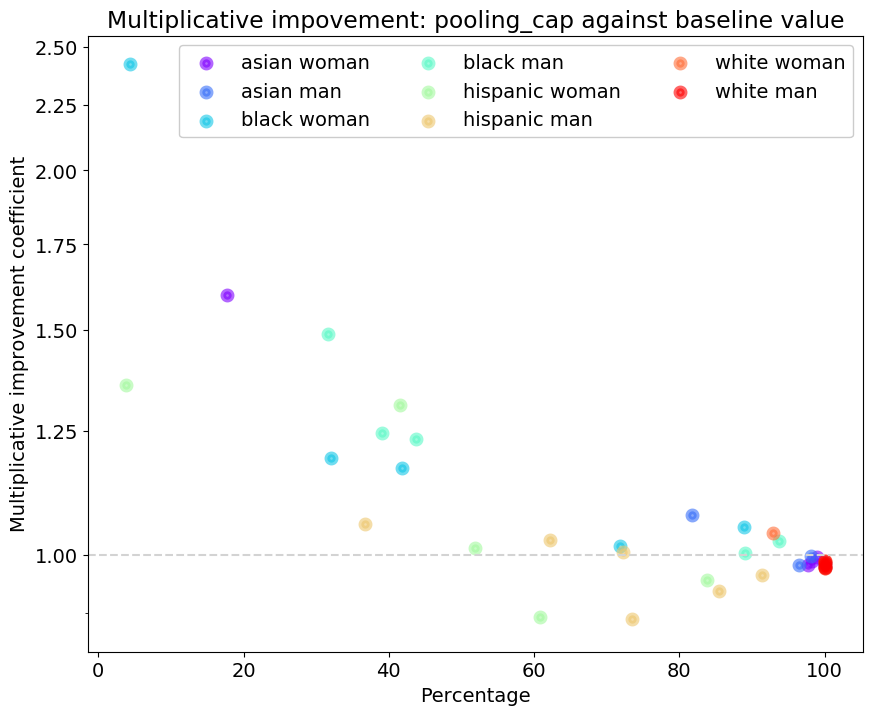

In [272]:
get_graph_([prompt_asian_dic, prompt_asian_Man_dic, prompt_black_dic, prompt_black_Man_dic, prompt_hispanic_dic, prompt_hispanic_Man_dic,  prompt_white_dic, prompt_white_Man_dic], [prompt_asian_dic_asian_num, prompt_asian_Man_dic_asian_Man_num, prompt_black_dic_black_num, prompt_black_Man_dic_black_Man_num, prompt_hispanic_dic_hispanic_num, prompt_hispanic_Man_dic_hispanic_Man_num, prompt_white_dic_white_num, prompt_white_Man_dic_white_Man_num], [lf, lf, lf, lf, lf, lf, lf, lf], len(modes), modes, sd = None, experiments=['asian woman', 'asian man', 'black woman', 'black man', 'hispanic woman', 'hispanic man', 'white woman', 'white man'],  title = 'Multiplicative impovement: pooling_cap against baseline value')


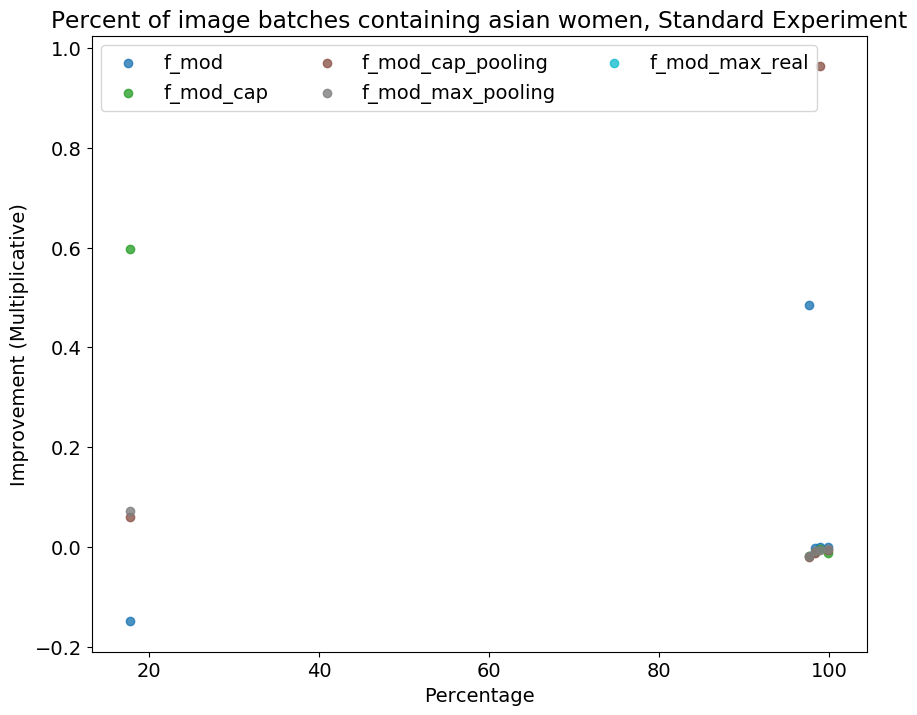

In [222]:
get_graph(prompt_asian_dic, prompt_asian_dic_asian_num, lf, len(modes), modes, sd = None,  title = 'Percent of image batches containing asian women', updated_experiment = False)


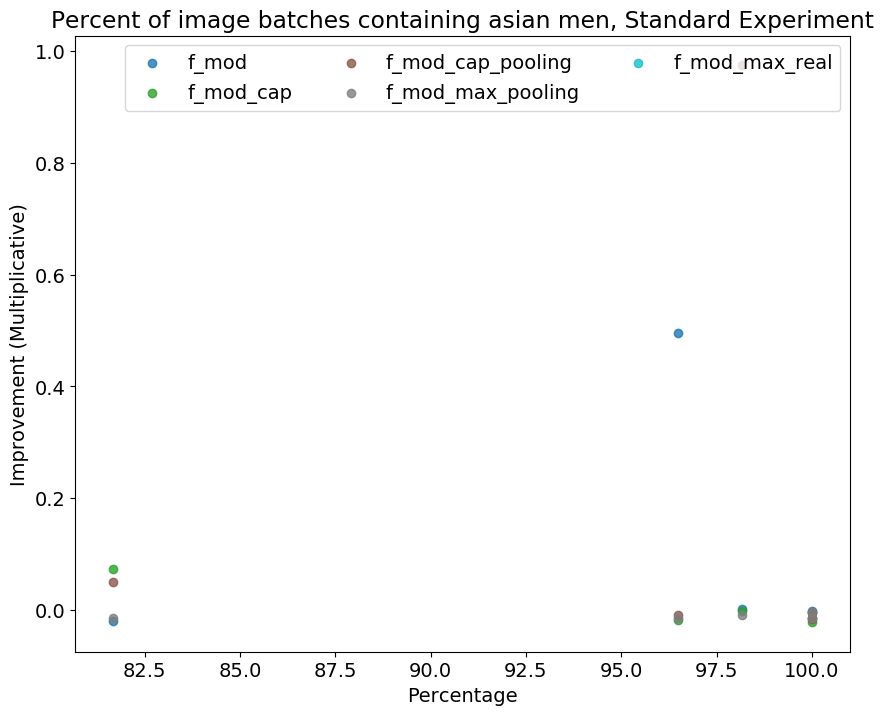

In [223]:
get_graph(prompt_asian_Man_dic, prompt_asian_Man_dic_asian_Man_num, lf, len(modes), modes, sd = None,  title = 'Percent of image batches containing asian men', updated_experiment = False)


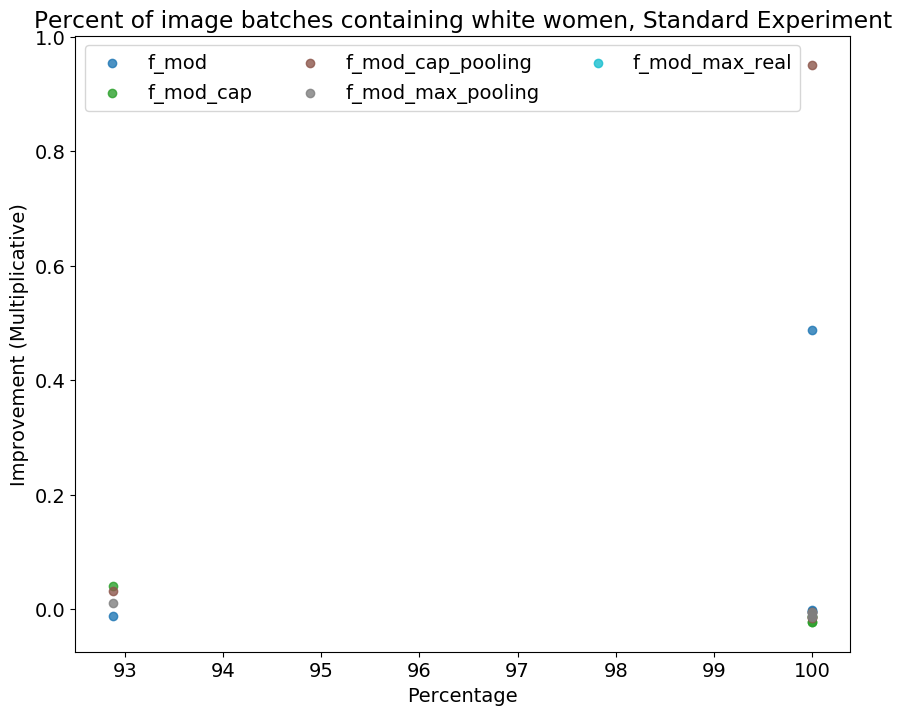

In [224]:
get_graph(prompt_white_dic, prompt_white_dic_white_num, lf, len(modes), modes, sd = None,  title = 'Percent of image batches containing white women', updated_experiment = False)

        

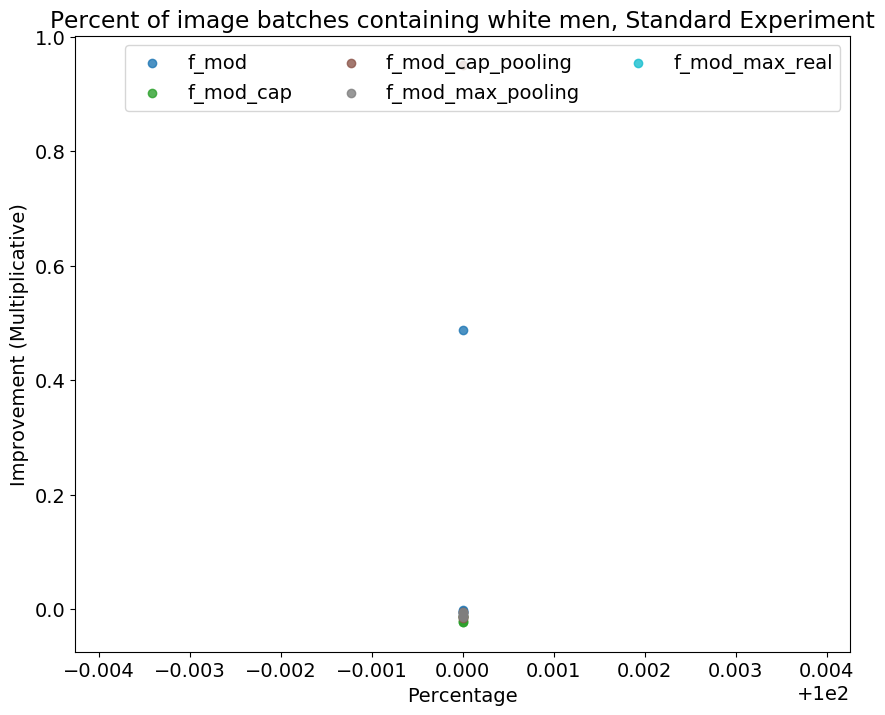

In [225]:
get_graph(prompt_white_Man_dic, prompt_white_Man_dic_white_Man_num, lf, len(modes), modes, sd = None,  title = 'Percent of image batches containing white men', updated_experiment = False)


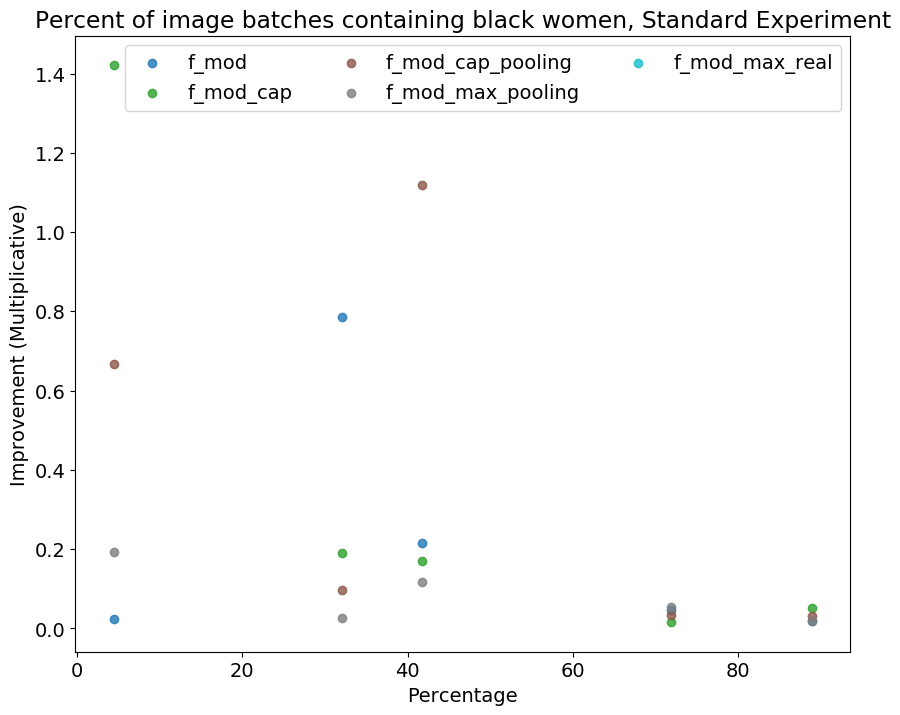

In [226]:
get_graph(prompt_black_dic, prompt_black_dic_black_num, lf, len(modes), modes, sd = None,  title = 'Percent of image batches containing black women', updated_experiment = False)


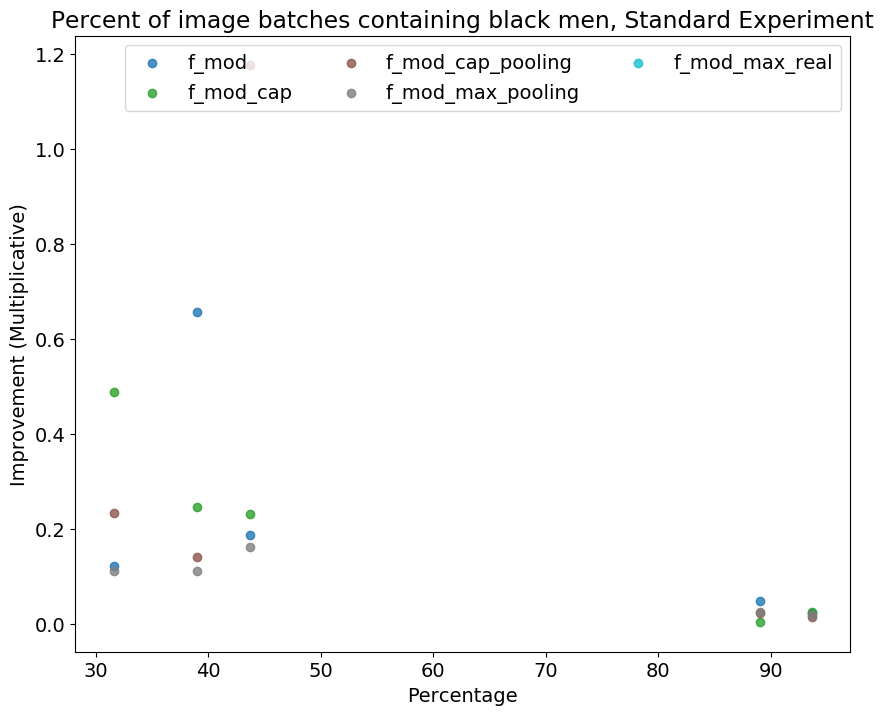

In [227]:
get_graph(prompt_black_Man_dic, prompt_black_Man_dic_black_Man_num, lf, len(modes), modes, sd = None,  title = 'Percent of image batches containing black men', updated_experiment = False)


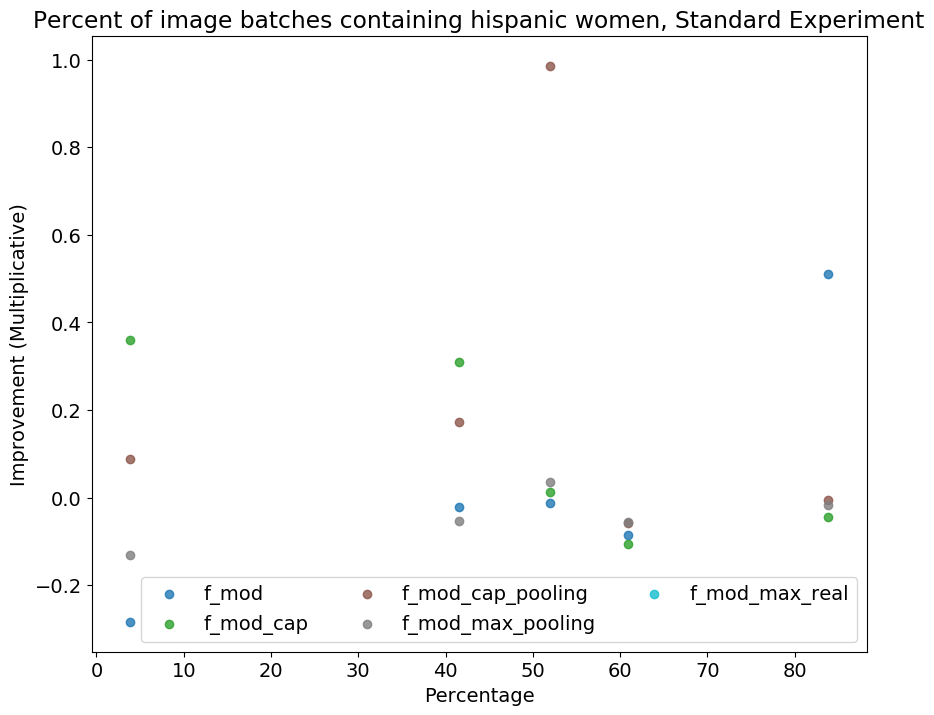

In [228]:
get_graph(prompt_hispanic_dic, prompt_hispanic_dic_hispanic_num, lf, len(modes), modes, sd = None,  title = 'Percent of image batches containing hispanic women', updated_experiment = False)


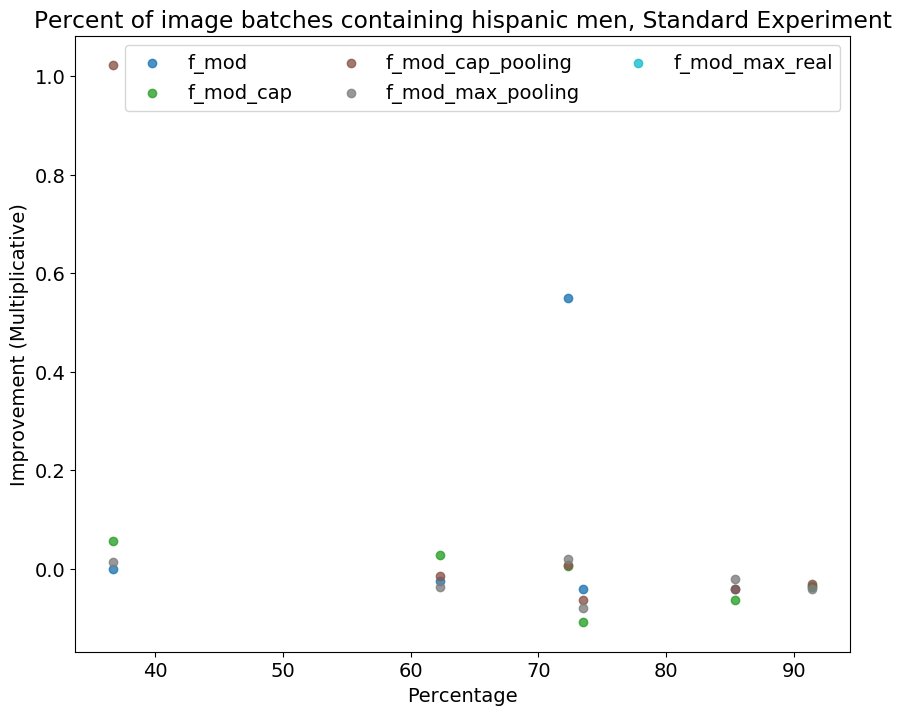

In [232]:
get_graph(prompt_hispanic_Man_dic, prompt_hispanic_Man_dic_hispanic_Man_num, lf, len(modes), modes, sd = None,  title = 'Percent of image batches containing hispanic men', updated_experiment = False)


In [230]:
prompt_all = {}
prompt_num = {}

In [ ]:
for k in prompt_hispanic_dic_.keys():
    if k in prompt_asian_dic_.keys() and k in prompt_white_dic_.keys() and k in prompt_black_dic_.keys():
        prompt_all[k] = {}
        prompt_num[k] = {}
        for m in prompt_hispanic_dic_[k].keys():
            if m in prompt_asian_dic_[k].keys() and m in prompt_white_dic_[k].keys() and m in prompt_black_dic_[k].keys():
                prompt_all[k][m] = 0
                prompt_num[k][m] = 0
                for b in prompt_hispanic_dic_[k][m].keys():
                    if b in prompt_asian_dic_[k][m].keys() and b in prompt_white_dic_[k][m].keys() and b in prompt_black_dic_[k][m].keys():
                         prompt_all[k][m] += prompt_hispanic_dic_[k][m][b]  * prompt_asian_dic_[k][m][b] * prompt_white_dic_[k][m][b] * prompt_black_dic_[k][m][b] 
                         prompt_num[k][m] += 1
for k in prompt_all.keys():
    for m in prompt_all[k].keys():
        prompt_all[k][m] = prompt_all[k][m] * 100 / prompt_num[k][m]

In [ ]:
get_graph(prompt_all, prompt_num, lf, len(modes), modes, sd = None,  title = 'Percent of image batches containing all types of ethnicities', updated_experiment = False)


In [ ]:
prompt__3_from_4 = {}
prompt_num = {}

In [ ]:
for k in prompt_hispanic_dic_.keys():
    if k in prompt_asian_dic_.keys() and k in prompt_white_dic_.keys() and k in prompt_black_dic_.keys():
        prompt__3_from_4[k] = {}
        prompt_num[k] = {}
        for m in prompt_hispanic_dic_[k].keys():
            if m in prompt_asian_dic_[k].keys() and m in prompt_white_dic_[k].keys() and m in prompt_black_dic_[k].keys():
                prompt__3_from_4[k][m] = 0
                prompt_num[k][m] = 0
                for b in prompt_hispanic_dic_[k][m].keys():
                    if b in prompt_asian_dic_[k][m].keys() and b in prompt_white_dic_[k][m].keys() and b in prompt_black_dic_[k][m].keys():
                         prompt__3_from_4[k][m] += prompt_hispanic_dic_[k][m][b] * prompt_asian_dic_[k][m][b] * prompt_black_dic_[k][m][b]  + prompt_hispanic_dic_[k][m][b] * prompt_white_dic_[k][m][b] * prompt_black_dic_[k][m][b]   + prompt_hispanic_dic_[k][m][b] * prompt_asian_dic_[k][m][b] * prompt_white_dic_[k][m][b] + prompt_asian_dic_[k][m][b] * prompt_white_dic_[k][m][b] * prompt_black_dic_[k][m][b] - 3 * prompt_hispanic_dic_[k][m][b] * prompt_asian_dic_[k][m][b] * prompt_white_dic_[k][m][b] * prompt_black_dic_[k][m][b] 
                         prompt_num[k][m] += 1
for k in prompt__3_from_4.keys():
    for m in prompt__3_from_4[k].keys():
        prompt__3_from_4[k][m] = prompt__3_from_4[k][m] * 100 / prompt_num[k][m]

In [ ]:
get_graph(prompt__3_from_4, prompt_num, lf, len(modes), modes, sd = None,  title = 'Percent of image batches containing at least 3 out of 4 types of ethnicities', updated_experiment = False)
